In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Sin Twist

In [2]:
b=[11.31, 11.31, 16, 16]
c_2=[1.8856, 1.414, 1.3333, 1]
c_4=[1.22,1.414, 0.8618, 1]
sol = []

for j in [0,1,2,3]:
    for i in [0.5*np.pi/180,1*np.pi/180,1.5*np.pi/180,2*np.pi/180,2.5*np.pi/180,3*np.pi/180,3.5*np.pi/180,4*np.pi/180,4.5*np.pi/180,5*np.pi/180]:
        A = np.array([[(((2*b[j])/(np.pi*c_2[j]))+1),(((-2*b[j])/(np.pi*c_2[j]))-3)], 
                  [(((np.sqrt(2)*b[j])/(np.pi*c_4[j]))+1),(((np.sqrt(2)*b[j])/(np.pi*c_4[j]))+3)]])
        B = np.array([i,i])
        X = np.linalg.inv(A).dot(B)
        
        sol.append(X)


In [3]:
ala_1 = pd.DataFrame(sol[0:10])
ala_2 = pd.DataFrame(sol[10:20])
ala_3 = pd.DataFrame(sol[20:30])
ala_4 = pd.DataFrame(sol[30:40])

In [4]:
ala_12 = ala_1.merge(ala_2, right_index=True, left_index=True)
ala_34 = ala_3.merge(ala_4, right_index=True, left_index=True)
ala = ala_12.merge(ala_34, right_index=True, left_index=True)

In [5]:
sist = pd.DataFrame(ala.values, columns = [["Ala 1", "Ala 1", "Ala 2", "Ala 2", "Ala 3", "Ala 3", "Ala 4" ,"Ala 4"], 
                                    ["A1", "A3", "A1", "A3", "A1", "A3", "A1", "A3"]], 
             index = [0.5,1,1.5,2,2.5,3,3.5,4,4.5,5])

A_1 = sist[[('Ala 1', 'A1'), ('Ala 2', 'A1'), ('Ala 3', 'A1'), ('Ala 4', 'A1')]]
A_3 = sist[[('Ala 1', 'A3'), ('Ala 2', 'A3'), ('Ala 3', 'A3'), ('Ala 4', 'A3')]]
sist

Ala 1               Ala 2               Ala 3               Ala 4  \
           A1        A3        A1        A3        A1        A3        A1   
0.5  0.001748 -0.000044  0.001656  0.000168  0.000971 -0.000032  0.000918   
1.0  0.003497 -0.000089  0.003311  0.000336  0.001942 -0.000063  0.001836   
1.5  0.005245 -0.000133  0.004967  0.000504  0.002913 -0.000095  0.002755   
2.0  0.006993 -0.000177  0.006623  0.000672  0.003884 -0.000127  0.003673   
2.5  0.008742 -0.000222  0.008279  0.000840  0.004855 -0.000158  0.004591   
3.0  0.010490 -0.000266  0.009934  0.001008  0.005826 -0.000190  0.005509   
3.5  0.012238 -0.000310  0.011590  0.001176  0.006797 -0.000222  0.006427   
4.0  0.013987 -0.000355  0.013246  0.001345  0.007768 -0.000254  0.007346   
4.5  0.015735 -0.000399  0.014901  0.001513  0.008739 -0.000285  0.008264   
5.0  0.017484 -0.000443  0.016557  0.001681  0.009710 -0.000317  0.009182   

               
           A3  
0.5  0.000117  
1.0  0.000234  
1.5  0.000351  
2.0  0.000469  
2.5  0.000586  
3.0  0.000703  
3.5  0.000820  
4.0  0.000937  
4.5  0.001054  
5.0  0.001171

In [6]:
AR=8

##cl
cl = sist[[('Ala 1', 'A1'), ('Ala 2', 'A1'), ('Ala 3', 'A1'), ('Ala 4', 'A1')]].values*np.pi*AR
cl_df = pd.DataFrame(cl, columns = [["Ala 1", "Ala 2", "Ala 3", "Ala 4"], ["cl"]*4], index = [0.5,1,1.5,2,2.5,3,3.5,4,4.5,5])
cl_df["Ala 3"] = cl_df["Ala 3"]*2
cl_df["Ala 4"] = cl_df["Ala 4"]*2
cl = cl_df.values

##e
e = 1/(3*((A_3.values/A_1.values)**2)+1)
e_df = pd.DataFrame(e, columns = [["Ala 1", "Ala 2", "Ala 3", "Ala 4"], ["e"]*4], index = [0.5,1,1.5,2,2.5,3,3.5,4,4.5,5])

##cd
cd = cl**2/(np.pi*AR*e)
cd_df = pd.DataFrame(cd, columns = [["Ala 1", "Ala 2", "Ala 3", "Ala 4"], ["cd"]*4], index = [0.5,1,1.5,2,2.5,3,3.5,4,4.5,5])
cd_df["Ala 3"] = cd_df["Ala 3"]/2
cd_df["Ala 4"] = cd_df["Ala 4"]/2
cd=cd_df.values

In [7]:
coef = cl_df.merge(cd_df, right_index=True, left_index=True).merge(e_df, right_index=True, left_index=True)
coef = coef.stack().unstack()
coef

Ala 1                         Ala 2                         Ala 3  \
           cd        cl         e        cd        cl         e        cd   
0.5  0.000077  0.043941  0.998076  0.000071  0.041612  0.970015  0.000048   
1.0  0.000308  0.087882  0.998076  0.000284  0.083225  0.970015  0.000190   
1.5  0.000693  0.131823  0.998076  0.000639  0.124837  0.970015  0.000428   
2.0  0.001232  0.175764  0.998076  0.001136  0.166450  0.970015  0.000761   
2.5  0.001924  0.219705  0.998076  0.001776  0.208062  0.970015  0.001189   
3.0  0.002771  0.263646  0.998076  0.002557  0.249675  0.970015  0.001712   
3.5  0.003772  0.307586  0.998076  0.003480  0.291287  0.970015  0.002330   
4.0  0.004926  0.351527  0.998076  0.004546  0.332900  0.970015  0.003043   
4.5  0.006235  0.395468  0.998076  0.005753  0.374512  0.970015  0.003851   
5.0  0.007697  0.439409  0.998076  0.007103  0.416125  0.970015  0.004755   

                           Ala 4                      
          cl         e        cd        cl         e  
0.5  0.04881  0.996815  0.000044  0.046154  0.953459  
1.0  0.09762  0.996815  0.000178  0.092309  0.953459  
1.5  0.14643  0.996815  0.000400  0.138463  0.953459  
2.0  0.19524  0.996815  0.000711  0.184618  0.953459  
2.5  0.24405  0.996815  0.001111  0.230772  0.953459  
3.0  0.29286  0.996815  0.001600  0.276927  0.953459  
3.5  0.34167  0.996815  0.002178  0.323081  0.953459  
4.0  0.39048  0.996815  0.002845  0.369235  0.953459  
4.5  0.43929  0.996815  0.003600  0.415390  0.953459  
5.0  0.48810  0.996815  0.004445  0.461544  0.953459

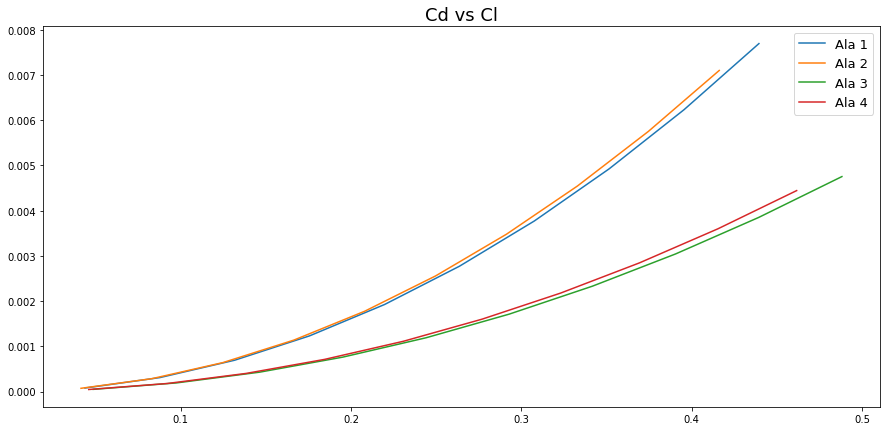

In [8]:
plt.subplots(figsize = (15,7))

plt.plot(coef["Ala 1"].cl, coef["Ala 1"].cd)
plt.plot(coef["Ala 2"].cl, coef["Ala 2"].cd)
plt.plot(coef["Ala 3"].cl, coef["Ala 3"].cd)
plt.plot(coef["Ala 4"].cl, coef["Ala 4"].cd)
plt.legend(["Ala 1", "Ala 2", "Ala 3", "Ala 4"], fontsize = 13)
plt.title("Cd vs Cl", fontsize = 18);

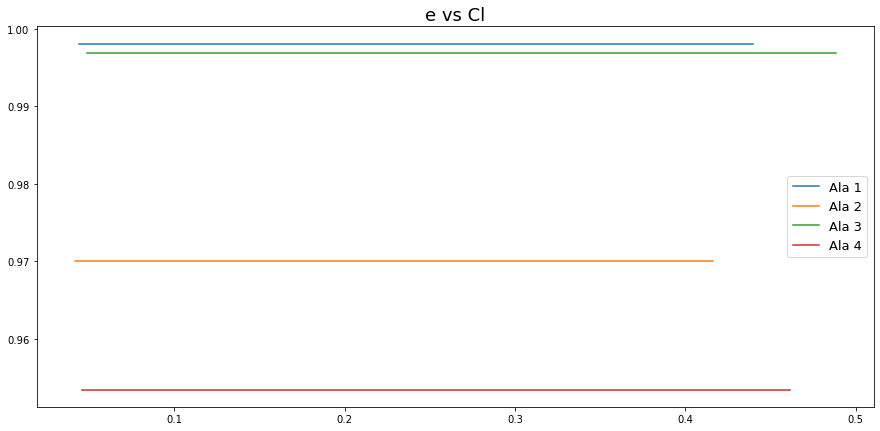

In [9]:
plt.subplots(figsize = (15,7))

plt.plot(coef["Ala 1"].cl, coef["Ala 1"].e)
plt.plot(coef["Ala 2"].cl, coef["Ala 2"].e)
plt.plot(coef["Ala 3"].cl, coef["Ala 3"].e)
plt.plot(coef["Ala 4"].cl, coef["Ala 4"].e)
plt.legend(["Ala 1", "Ala 2", "Ala 3", "Ala 4"], fontsize = 13)
plt.title("e vs Cl", fontsize = 18);

# Con Twist

In [10]:
b=16
c_2=1.3333
c_4=0.8618
sol_2 = []


for i in [0.5*np.pi/180,1*np.pi/180,1.5*np.pi/180,2*np.pi/180,2.5*np.pi/180,3*np.pi/180,3.5*np.pi/180,4*np.pi/180,4.5*np.pi/180,5*np.pi/180]:
    A = np.array([[(((2*b)/(np.pi*c_2))+1),(((-2*b)/(np.pi*c_2))-3)], 
                  [(((np.sqrt(2)*b)/(np.pi*c_4))+1),(((np.sqrt(2)*b)/(np.pi*c_4))+3)]])
    B = np.array([i+0.035,i+0.01022])
    X = np.linalg.inv(A).dot(B)
        
    sol_2.append(X)


In [11]:
sist_2 = pd.DataFrame(sol_2, columns = ["A1", "A3"], index = [0.5,1,1.5,2,2.5,3,3.5,4,4.5,5])
sist_2

,A1,A3
0.5,0.003532,-0.001242
1.0,0.004503,-0.001273
1.5,0.005474,-0.001305
2.0,0.006445,-0.001337
2.5,0.007416,-0.001369
3.0,0.008387,-0.001400
3.5,0.009358,-0.001432
4.0,0.010329,-0.001464
4.5,0.011300,-0.001495
5.0,0.012271,-0.001527


In [12]:
AR_3 = 16

cl_3 = sist_2["A1"].values*np.pi*AR_3
e_3 = 1/(1+3*((sist_2["A3"]/sist_2["A1"])**2))
cd_3 = cl_3**2/(np.pi*e_3*AR_3)
coef_3 = pd.DataFrame((cl_3,e_3,cd_3)).T
coef_3.index = [0.5,1,1.5,2,2.5,3,3.5,4,4.5,5]
coef_3.columns = ["cl_3", "e_3", "cd_3"]

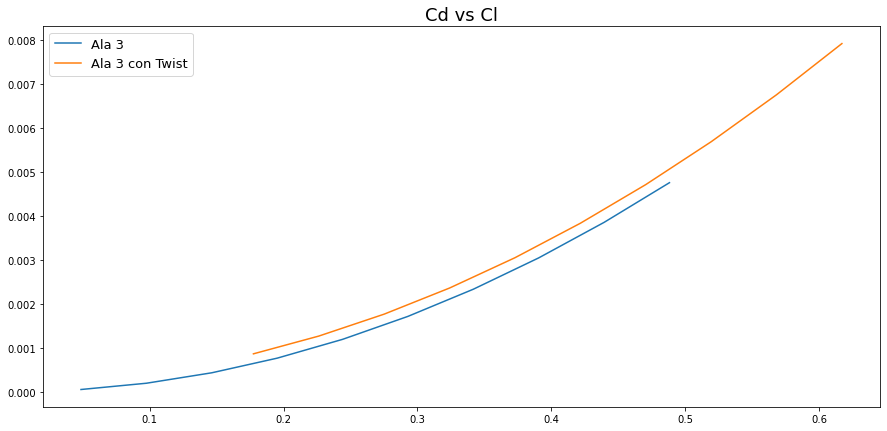

In [13]:
plt.subplots(figsize = (15,7))

plt.plot(coef["Ala 3"].cl, coef["Ala 3"].cd, label = "Ala 3")
plt.plot(coef_3.cl_3, coef_3.cd_3, label= "Ala 3 con Twist")
plt.legend(fontsize = 13)
plt.title("Cd vs Cl", fontsize = 18);

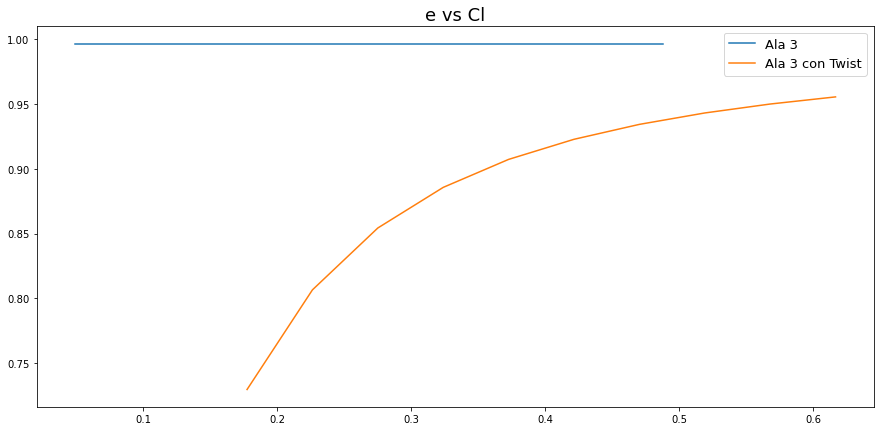

In [14]:
plt.subplots(figsize = (15,7))

plt.plot(coef["Ala 3"].cl, coef["Ala 3"].e, label = "Ala 3")
plt.plot(coef_3.cl_3, coef_3.e_3, label= "Ala 3 con Twist")
plt.legend(fontsize = 13)
plt.title("e vs Cl", fontsize = 18);